In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## Task 3: Load in the Dataset in your Jupyter Notebook

In the Jupyter notebook you created in the previous task, add a code cell, and copy the contents below to load the Boston housing dataset in the notebook:

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate basic statistics and visualizations for upper management. 

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

### 1. For the "Median value of owner-occupied homes" provide a boxplot


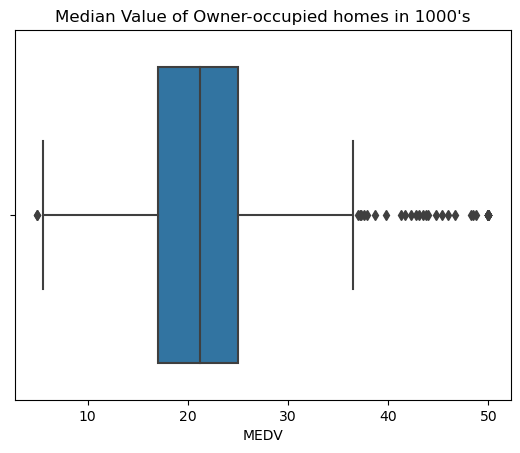

In [4]:
# Median value of owner-occupied homes

sns.boxplot(x="MEDV", data=boston_df, )

plt.title("Median Value of Owner-occupied homes in 1000's")
plt.show()

- The distribution of `median value of owner-occupied homes` are concentrated between 17,000 and 25,000 although a reasonable amount fall above 35,000

- Considering the mean value of 22.5 and median value of 21.20, the mean > median, the MEDV feature is `Positively skewed` with tail on the right.

<Axes: xlabel='MEDV', ylabel='Density'>

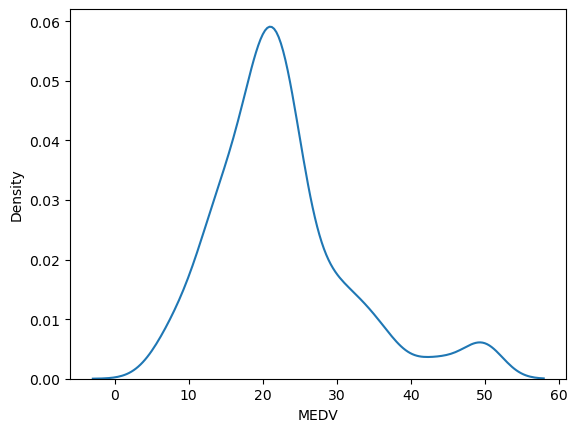

In [5]:
sns.kdeplot(boston_df["MEDV"])

In [6]:
boston_df["MEDV"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [7]:
boston_df["MEDV"].mean()

22.532806324110677

### 2. Provide a  bar plot for the Charles river variable


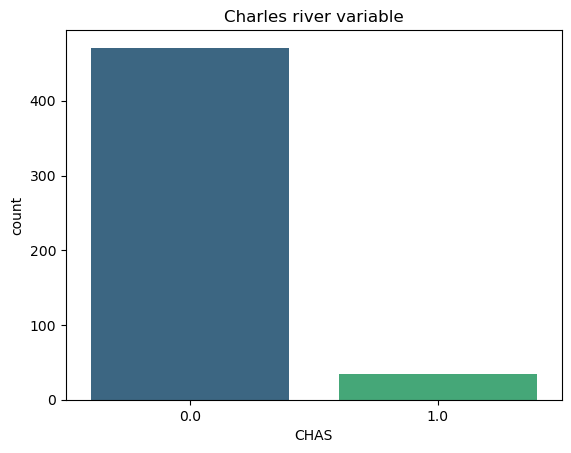

In [8]:
# - Provide a  bar plot for the Charles river variable

sns.countplot(x="CHAS", data=boston_df, palette="viridis")
plt.title("Charles river variable")
plt.show()

- Shows an uneven distribution, the number of houses bounded by the Charles rivers are a lot less than those not bounded... i.e it is more common to find houses not bounded by the Charlse river than those bounded by its tracts(i.e mode = 0)

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


In [9]:
# - Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 years and 70 years and older)

In [10]:
boston_df.loc[(boston_df["AGE"]<= 35), "age_group"] = "35 and younger"
boston_df.loc[(boston_df["AGE"]> 35)&(boston_df["AGE"]<70), "age_group"] = "between 35 and 70"
boston_df.loc[(boston_df["AGE"]> 70), "age_group"] = "70 years and older"

boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


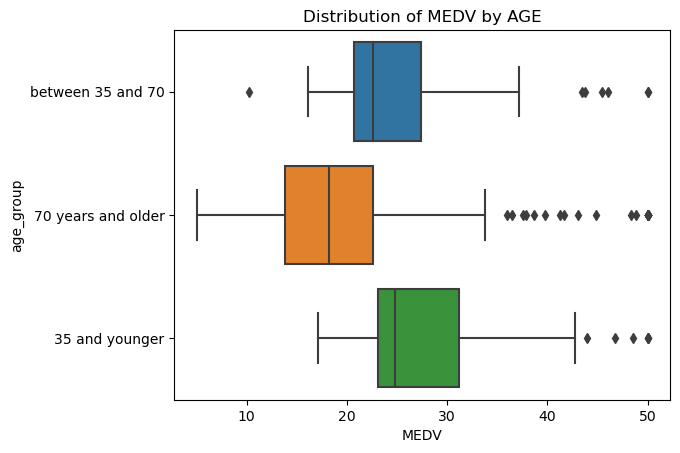

In [11]:
sns.boxplot(x="MEDV", y="age_group",  data=boston_df, )

plt.title("Distribution of MEDV by AGE")
plt.show()

- The median value of owner-occupied homes of people younger than 35 is greater than that of other age categories
- The interquartile ranges are reasonably similar (as shown by the lengths of the boxes), though the overall range of the data set is greater for people older than 70years 
- All three categories are skewed positively skewed
- it is safe to say that age is related to median owner-occupied homes.



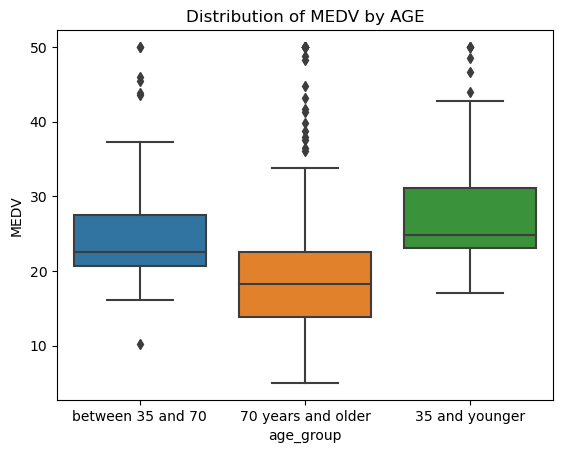

In [12]:
sns.boxplot(x="age_group", y="MEDV",  data=boston_df, )

plt.title("Distribution of MEDV by AGE")
plt.show()

### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


In [13]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-
#retail business acres per town. What can you say about the relationship?

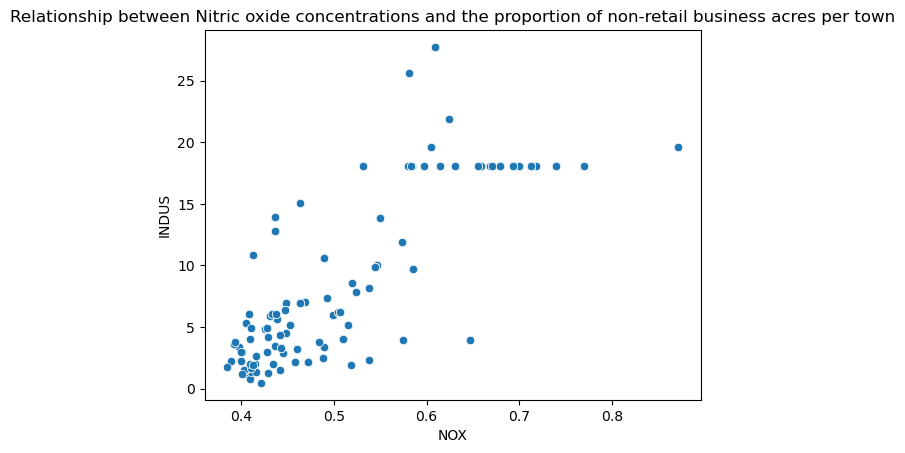

In [14]:
sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

- The chart shows an uphill pattern from left to right, this indicates a positive relationship between Nitric Oxide concentrations and the proportion of non-retail business acres per town
- That is, as NOX increases, INDUS tends to increase as well, NOX is a good preedictor of INDUS


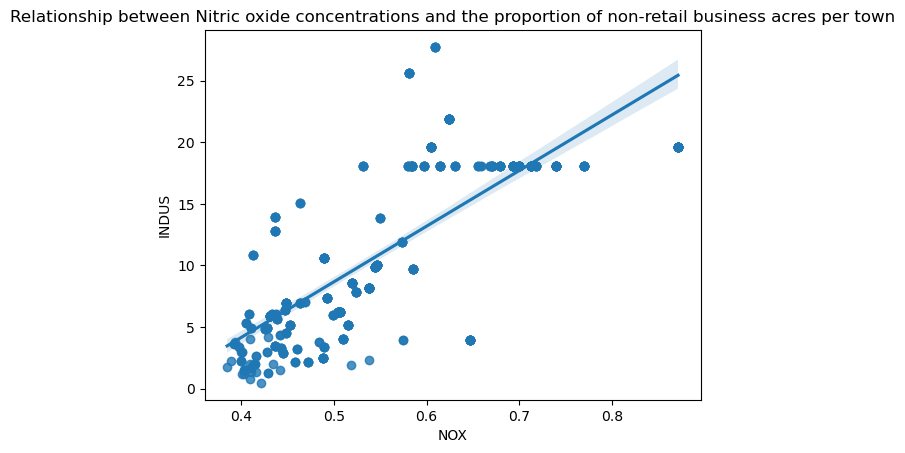

In [15]:
sns.regplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

### 5. Create a histogram for the pupil to teacher ratio variable

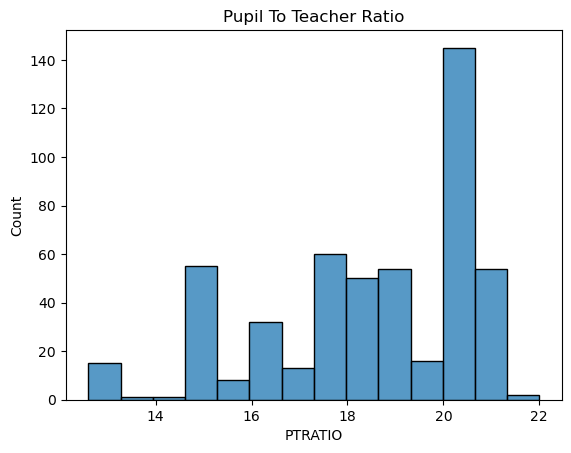

In [16]:
sns.histplot(boston_df["PTRATIO"])
plt.title("Pupil To Teacher Ratio")
plt.show()

- The distribution is negatively skewed with median(19.05) > mean(18.45)

In [17]:
boston_df["PTRATIO"].mean()

18.455533596837945

<Axes: xlabel='PTRATIO', ylabel='Density'>

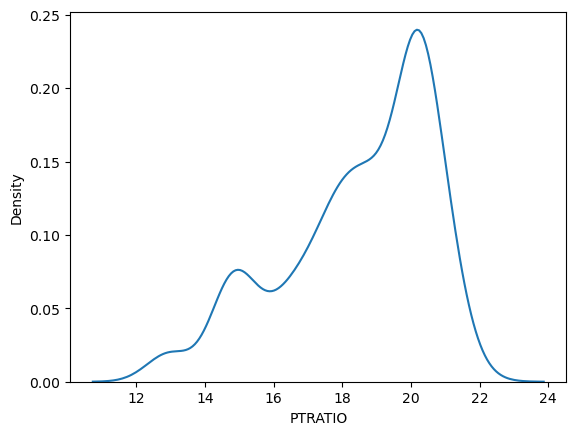

In [18]:
sns.kdeplot(boston_df["PTRATIO"])

## Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

HYPOTHESIS:

Null Hypothesis - There is no difference in the median value of houses bounded by the Charles river and those not bounded by the Chales river
Alternate Hypothesis - There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by the Chales river

alpha = 0.05

In [19]:
import scipy.stats

In [20]:
scipy.stats.levene(boston_df[boston_df["CHAS"]== 1]["MEDV"], boston_df[boston_df["CHAS"]==0]["MEDV"], center="mean")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [21]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]== 1]["MEDV"], boston_df[boston_df["CHAS"]==0]["MEDV"], equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

Because the p-value of the levene test 0.032<0.05, we note that variance is unequal, therefore set equal_var=False on the ttest.

CONCLUSION: There is a difference in median value of houses based on the Charles river variable

- p-value(0.0357)<alpha(0.05) we reject the null hypothesis that is
- We conclude that there is a statistically significant difference in the median value of houses bounded by the Charlse river than the median value of houses not bounded by the charles river
- Any assumption of no difference in median value of those bounded vs those not bounded by the Chares river is False
- See chart below

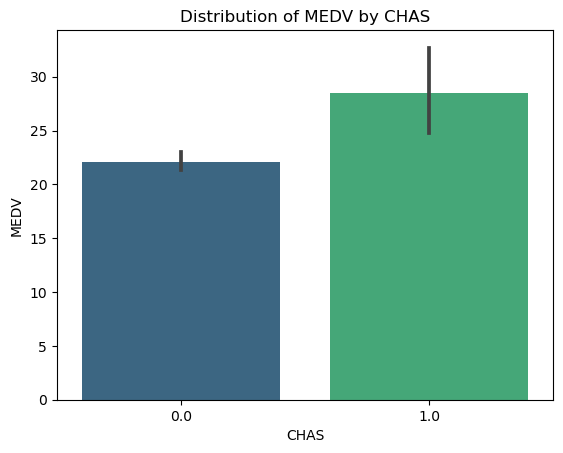

In [22]:
sns.barplot(x="CHAS", y="MEDV", data=boston_df, palette="viridis")
plt.title("Distribution of MEDV by CHAS")
plt.show()

In [23]:
boston_df.groupby(["CHAS"]).agg({"MEDV":["count", "mean", "std"]})

MEDV                      
     count       mean        std
CHAS                            
0.0    471  22.093843   8.831362
1.0     35  28.440000  11.816643

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

HYPOTHESIS:

Null Hypothesis - There is no difference in the median value of houses for each proportion of owner occupied units built prior to 1940 
Alternate Hypothesis - There is a significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940 

alpha = 0.05

In [24]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70


In [25]:
below_thirtyfive = boston_df.loc[(boston_df["AGE"]<= 35), "AGE"] 
below_seventy = boston_df.loc[(boston_df["AGE"]> 35)&(boston_df["AGE"]<70), "AGE"] 
above_seventy = boston_df.loc[(boston_df["AGE"]> 70), "AGE"]

In [26]:
above_seventy

1       78.9
7       96.1
8      100.0
9       85.9
10      94.3
       ...  
500     79.7
502     76.7
503     91.0
504     89.3
505     80.8
Name: AGE, Length: 287, dtype: float64

In [27]:
f_statistic, p_value = scipy.stats.f_oneway(below_thirtyfive, below_seventy, above_seventy)
print("F-Statistic: {0}, P-value: {1}".format(f_statistic, p_value))

F-Statistic: 2162.99425724172, P-value: 9.005770381051771e-248


CONCLUSION:There is a difference in the median value of each proportion of owner occupied homes based on age groups.

- p-value(9.005e-248)<alpha(0.05) we reject the null hypothesis that is
- We conclude that there is a statistically significant difference in the median value of houses for each proportion of owner occupied units built prior to 1940  
- Any assumption of no difference in median value for each proportion of owner occupied units built prior to 1940 is False
- See chart below

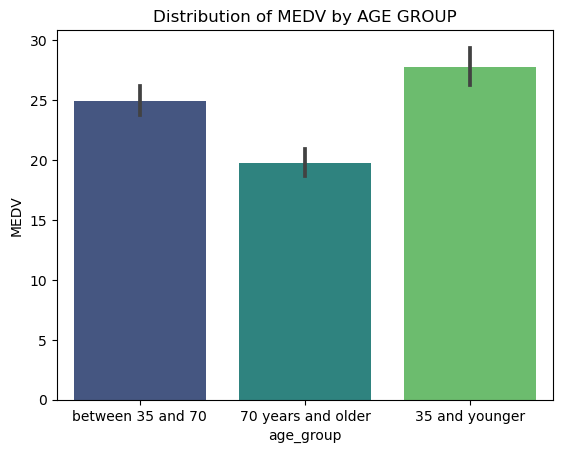

In [28]:
sns.barplot(x="age_group", y="MEDV", data=boston_df, palette="viridis")
plt.title("Distribution of MEDV by AGE GROUP")
plt.show()

In [29]:
boston_df.groupby(["age_group"]).agg({"MEDV":["count", "mean", "std"]})

MEDV                     
                   count       mean       std
age_group                                    
35 and younger        91  27.775824  7.638198
70 years and older   287  19.793380  9.515375
between 35 and 70    128  24.947656  6.969370

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

HYPOTHESIS:

Null Hypothesis - There is no relationship between NOX concentrations and INDUS(propotion of non-retail business acres per town)

Alternate Hypothesis - There is a relationship(upward or downward) between NOX concentrations and INDUS(propotion of non-retail business acres per town)

alpha = 0.05

In [30]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061238693e-98)

CONCLUSION:There is a relationship between NOX and INDUS

- p-value(7.913e-98)<alpha(0.05) we reject the null hypothesis that is
- We conclude that there is a relationship between NOX concentrations and propotion of non-retail business acres per town
- See chart below 

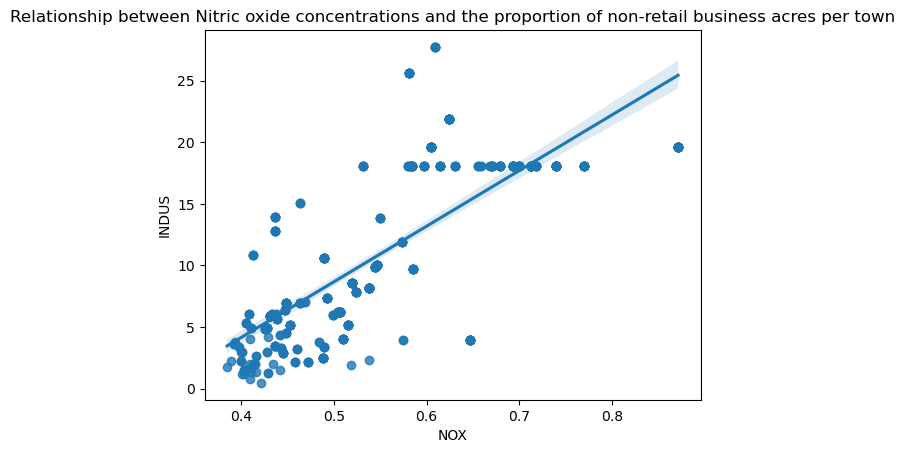

In [31]:
sns.regplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


HYPOTHESIS:

Null Hypothesis - There is no impact of additional(increase in)weighted distance on the median value of owner occupied homes

Alternate Hypothesis - There is an impact(upward or downward) of additional(increase in) weighted distance on the median value of owner occupied homes

alpha = 0.05

In [32]:
import statsmodels.api as sm

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        19:11:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSION:There is an impact(upward) of additional(increase in) weighted distance on the median value of owner occupied homes

- With coefficient of 1.0916, we conclude that as the weighted distance to the five Boston employment center increases, the median value of owner occupied homes increases by 1.0916 times.
- From the r-squared, we get that the correlation coefficient of 0.031, which proves the weak positive relationship
- See chart below

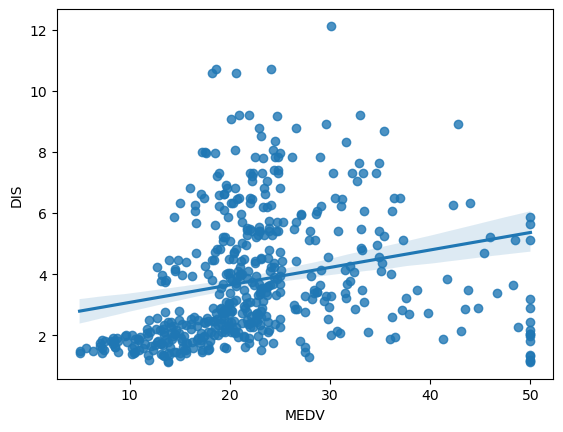

In [34]:
sns.regplot(x="MEDV", y="DIS", data=boston_df)
plt.show()